# Configuração e Carregamento de Dados

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Atribuir nomes às colunas (atributos) conforme a descrição
colunas = [
    'Area', 'Perimetro', 'Compacidade', 'Comprimento_Nucleo',
    'Largura_Nucleo', 'Coeficiente_Assimetria', 'Comprimento_Sulco_Nucleo', 'Variedade'
]

# Dados brutos fornecidos (Seeds Dataset)
# O dataset tem 210 linhas e 8 colunas, usando espaço/tab como separador
data_content = """
15.26	14.84	0.871	5.763	3.312	2.221	5.22	1
14.88	14.57	0.8811	5.554	3.333	1.018	4.956	1
14.29	14.09	0.905	5.291	3.337	2.699	4.825	1
... (restante dos dados omitidos aqui para brevidade)
12.3	13.34	0.8684	5.243	2.974	5.637	5.063	3
"""

# Usar o Pandas para ler o conteúdo (string) com separador de espaços em branco (\s+)
from io import StringIO
df = pd.read_csv(StringIO(open('seeds_dataset.txt').read()), sep='\s+', header=None, names=colunas)

mapeamento_variedade = {1: 'Kama', 2: 'Rosa', 3: 'Canadian'}
df['Variedade_Nome'] = df['Variedade'].map(mapeamento_variedade)

print("--- Primeiras Linhas do Dataset ---")
print(df.head())
print("\n--- Informações do Dataset (Tipos de Dados, Não-Nulos) ---")
print(df.info())

--- Primeiras Linhas do Dataset ---
    Area  Perimetro  Compacidade  Comprimento_Nucleo  Largura_Nucleo  \
0  15.26      14.84       0.8710               5.763           3.312   
1  14.88      14.57       0.8811               5.554           3.333   
2  14.29      14.09       0.9050               5.291           3.337   
3  13.84      13.94       0.8955               5.324           3.379   
4  16.14      14.99       0.9034               5.658           3.562   

   Coeficiente_Assimetria  Comprimento_Sulco_Nucleo  Variedade Variedade_Nome  
0                   2.221                     5.220          1           Kama  
1                   1.018                     4.956          1           Kama  
2                   2.699                     4.825          1           Kama  
3                   2.259                     4.805          1           Kama  
4                   1.355                     5.175          1           Kama  

--- Informações do Dataset (Tipos de Dados, Não-Nu

<>:33: SyntaxWarning: invalid escape sequence '\s'
<>:33: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-924880375.py:33: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(StringIO(open('seeds_dataset.txt').read()), sep='\s+', header=None, names=colunas)


# Estatísticas Descritivas

In [19]:
print("\n--- Estatísticas Descritivas das Características ---")
# Excluir a coluna 'Variedade' e 'Variedade_Nome'
print(df.drop(['Variedade', 'Variedade_Nome'], axis=1).describe().T)

# Média, Mediana e Desvio Padrão
stats_df = df.drop(['Variedade', 'Variedade_Nome'], axis=1).agg(['mean', 'median', 'std'])
print("\n--- Média, Mediana e Desvio Padrão Detalhados ---")
print(stats_df)


--- Estatísticas Descritivas das Características ---
                          count       mean       std      min       25%  \
Area                      210.0  14.847524  2.909699  10.5900  12.27000   
Perimetro                 210.0  14.559286  1.305959  12.4100  13.45000   
Compacidade               210.0   0.870999  0.023629   0.8081   0.85690   
Comprimento_Nucleo        210.0   5.628533  0.443063   4.8990   5.26225   
Largura_Nucleo            210.0   3.258605  0.377714   2.6300   2.94400   
Coeficiente_Assimetria    210.0   3.700201  1.503557   0.7651   2.56150   
Comprimento_Sulco_Nucleo  210.0   5.408071  0.491480   4.5190   5.04500   

                               50%        75%      max  
Area                      14.35500  17.305000  21.1800  
Perimetro                 14.32000  15.715000  17.2500  
Compacidade                0.87345   0.887775   0.9183  
Comprimento_Nucleo         5.52350   5.979750   6.6750  
Largura_Nucleo             3.23700   3.561750   4.0330  
Coe

# Visualização da Distribuição (Histogramas e Boxplots)

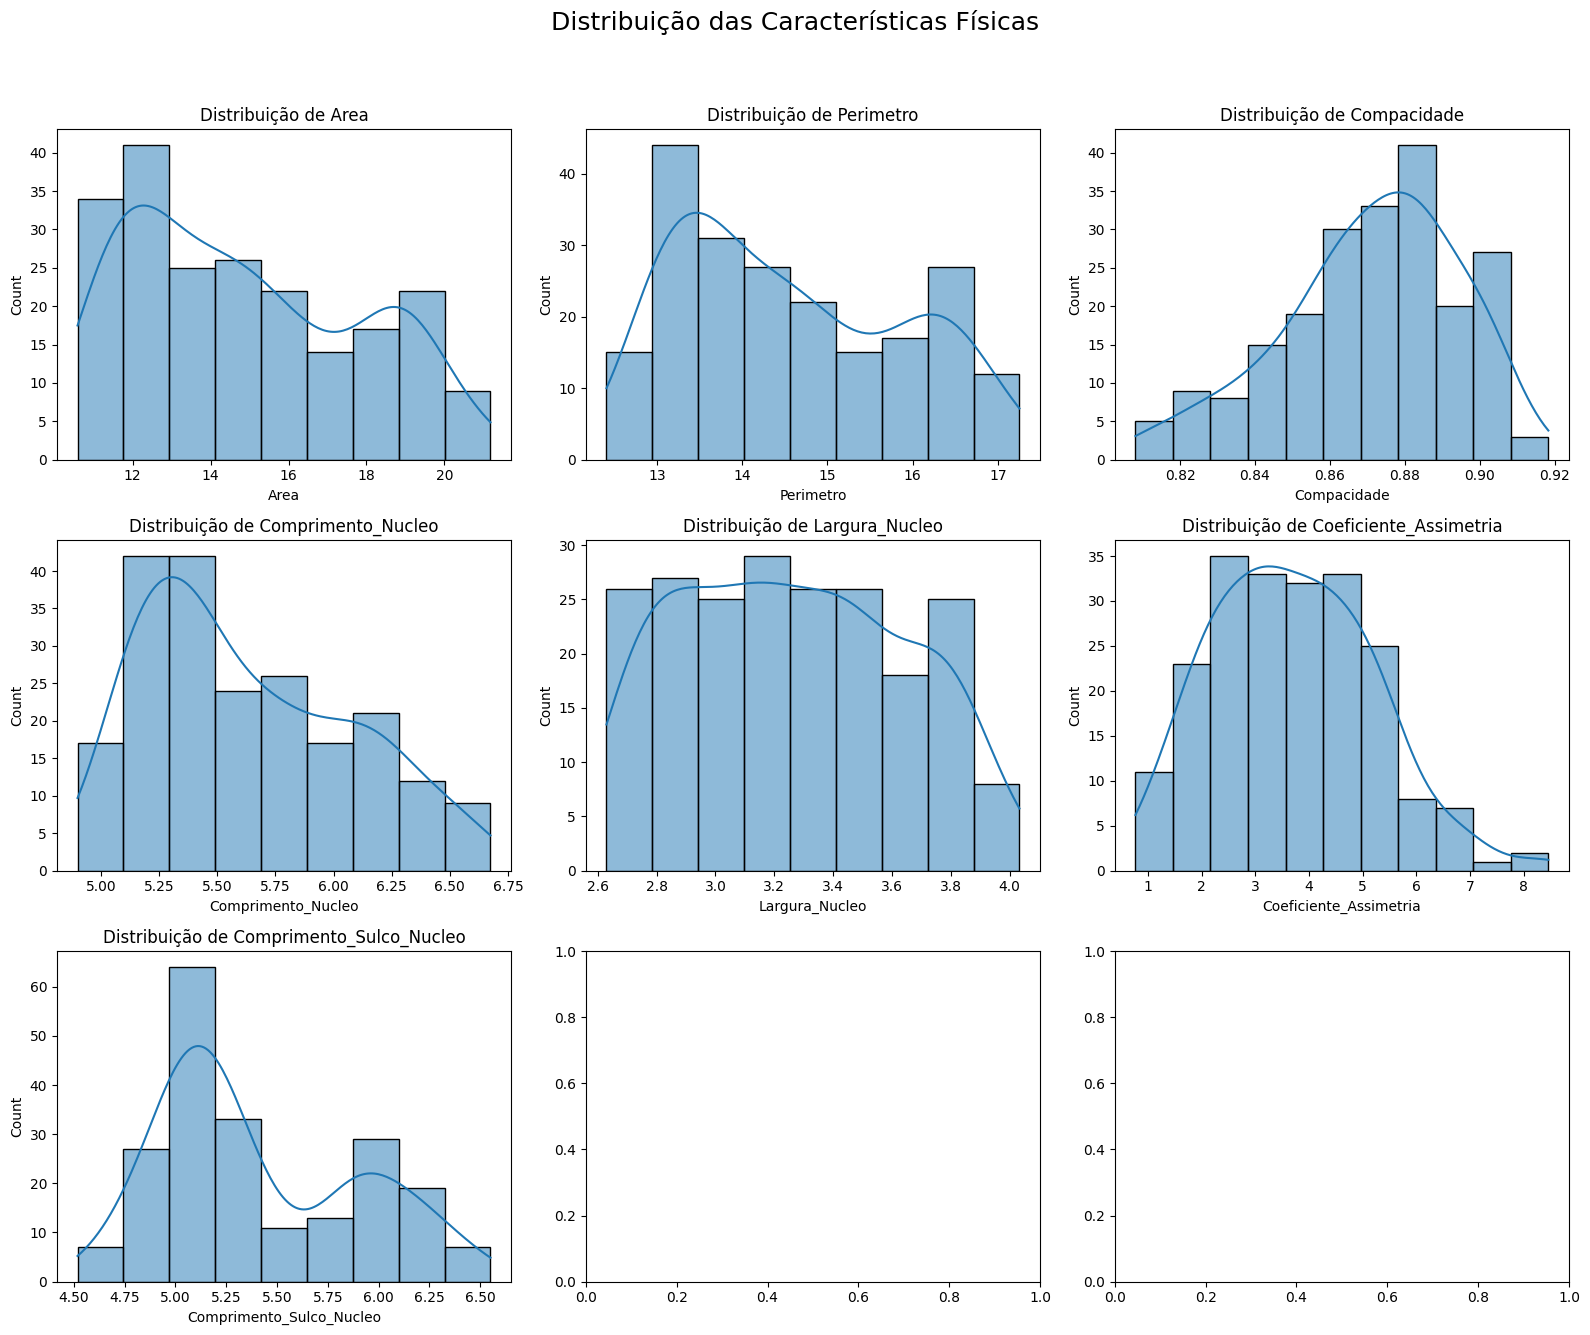

/tmp/ipython-input-1059851857.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Variedade_Nome', y=col, data=df, palette='Set2')
/tmp/ipython-input-1059851857.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Variedade_Nome', y=col, data=df, palette='Set2')
/tmp/ipython-input-1059851857.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Variedade_Nome', y=col, data=df, palette='Set2')
/tmp/ipython-input-1059851857.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. 

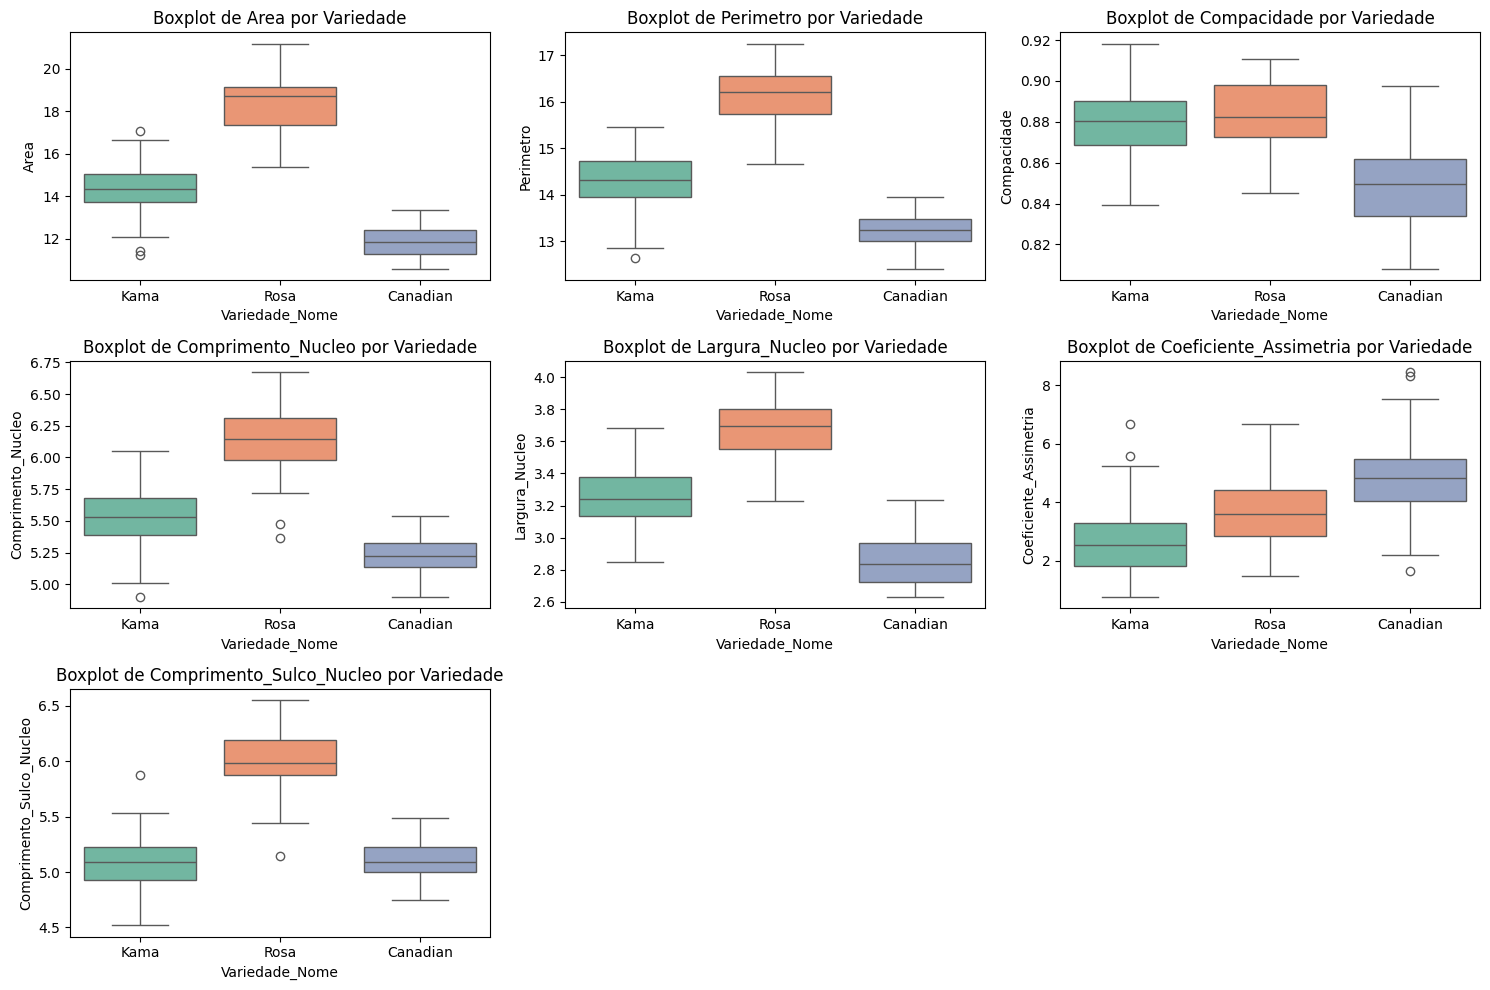

In [20]:
caracteristicas = colunas[:-1] # Todas as colunas exceto 'Variedade'

# Histograma e Boxplot de distribuição
fig, axes = plt.subplots(3, 3, figsize=(16, 14))
fig.suptitle('Distribuição das Características Físicas', fontsize=18)

for i, col in enumerate(caracteristicas):
    # Histograma (Distribuição)
    sns.histplot(df[col], kde=True, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f'Distribuição de {col}', fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Boxplots por Variedade (para identificar separabilidade)
plt.figure(figsize=(15, 10))
for i, col in enumerate(caracteristicas):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='Variedade_Nome', y=col, data=df, palette='Set2')
    plt.title(f'Boxplot de {col} por Variedade')

plt.tight_layout()
plt.show()

# Relações entre Características (Matriz de Correlação)

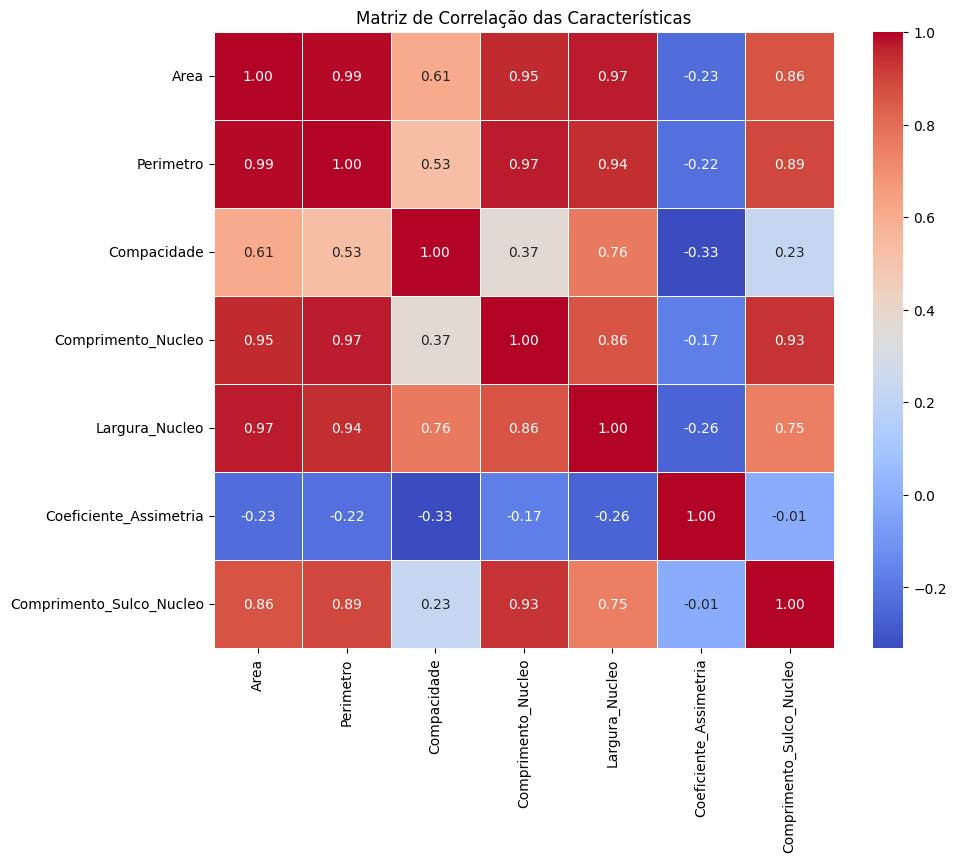

In [28]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.drop(['Variedade', 'Variedade_Nome'], axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação das Características')
plt.show()


# Tratamento de Valores Ausentes e Escalonamento

In [22]:
# 1. Identificar e tratar valores ausentes
print("\n--- Contagem de Valores Ausentes ---")
print(df.isnull().sum())
# Conclusão: Não há valores ausentes (NaN) neste dataset, o que simplifica o pré-processamento.

# 2. Avaliar e aplicar Escalonamento (Padronização)
# Separar X (características) e y (variável alvo)
X = df[caracteristicas]
y = df['Variedade']

# A Padronização é necessária para algoritmos baseados em distância (KNN, SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("\n--- Estatísticas após Padronização (Média ≈ 0, Desvio Padrão ≈ 1) ---")
print(X_scaled_df.describe().T)


--- Contagem de Valores Ausentes ---
Area                        0
Perimetro                   0
Compacidade                 0
Comprimento_Nucleo          0
Largura_Nucleo              0
Coeficiente_Assimetria      0
Comprimento_Sulco_Nucleo    0
Variedade                   0
Variedade_Nome              0
dtype: int64

--- Estatísticas após Padronização (Média ≈ 0, Desvio Padrão ≈ 1) ---
                          count          mean       std       min       25%  \
Area                      210.0 -3.383537e-16  1.002389 -1.466714 -0.887955   
Perimetro                 210.0  1.184238e-16  1.002389 -1.649686 -0.851433   
Compacidade               210.0  1.285744e-15  1.002389 -2.668236 -0.598079   
Comprimento_Nucleo        210.0 -2.097793e-15  1.002389 -1.650501 -0.828682   
Largura_Nucleo            210.0 -3.383537e-16  1.002389 -1.668209 -0.834907   
Coeficiente_Assimetria    210.0 -3.383537e-16  1.002389 -1.956769 -0.759148   
Comprimento_Sulco_Nucleo  210.0 -8.987520e-17  1.002389

# Separação dos Dados

In [23]:
# Separação em Treinamento (70%) e Teste (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\nTamanho do Treinamento: {X_train.shape[0]} amostras")
print(f"Tamanho do Teste: {X_test.shape[0]} amostras")


Tamanho do Treinamento: 147 amostras
Tamanho do Teste: 63 amostras


# Treinamento e Avaliação Inicial

In [24]:
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM_RBF': SVC(kernel='rbf', random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42)
}

results = {}

print("\n--- Treinamento e Avaliação Inicial dos Modelos ---")

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Avaliação das métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {'Acurácia': accuracy, 'Precisão': precision, 'Recall': recall, 'F1-Score': f1, 'Matriz_Confusao': cm}

    print(f"\nModelo: **{name}**")
    print(f"Acurácia: {accuracy:.4f}")



--- Treinamento e Avaliação Inicial dos Modelos ---

Modelo: **KNN**
Acurácia: 0.8730

Modelo: **SVM_RBF**
Acurácia: 0.8730

Modelo: **RandomForest**
Acurácia: 0.9206

Modelo: **LogisticRegression**
Acurácia: 0.8571


# Comparação de Desempenho Inicial

In [25]:
results_df_inicial = pd.DataFrame({k: {m: v for m, v in val.items() if m != 'Matriz_Confusao'} for k, val in results.items()}).T
print("\n--- Comparação de Desempenho Inicial ---")
print(results_df_inicial.sort_values(by='Acurácia', ascending=False))


--- Comparação de Desempenho Inicial ---
                    Acurácia  Precisão    Recall  F1-Score
RandomForest        0.920635  0.923942  0.920635  0.919170
KNN                 0.873016  0.872144  0.873016  0.871284
SVM_RBF             0.873016  0.872144  0.873016  0.871284
LogisticRegression  0.857143  0.857143  0.857143  0.854294


# Otimização dos Modelos (Grid Search)

In [26]:
# Espaço de hiperparâmetros
param_grid_knn = {'n_neighbors': [1, 3, 5, 7, 9], 'weights': ['uniform', 'distance']}
param_grid_logreg = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['lbfgs', 'newton-cg']}

param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, None]}
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['rbf', 'linear']}

# Inicializar e treinar o Grid Search
gs_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy').fit(X_train, y_train)

gs_logreg = GridSearchCV(LogisticRegression(random_state=42), param_grid_logreg, cv=5, scoring='accuracy').fit(X_train, y_train)

gs_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy').fit(X_train, y_train)
gs_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5, scoring='accuracy').fit(X_train, y_train)


best_models = {
    'KNN_Otimizado': gs_knn.best_estimator_,
    'LogReg_Otimizado': gs_logreg.best_estimator_,
    'RandomForest_Otimizado': gs_rf.best_estimator_,
    'SVM_Otimizado': gs_svm.best_estimator_
}

print(f"\nMelhores Hiperparâmetros - KNN: {gs_knn.best_params_}")
print(f"Melhores Hiperparâmetros - Regressão Logística: {gs_logreg.best_params_}")
print(f"Melhores Hiperparâmetros - Random Forest: {gs_rf.best_params_}")
print(f"Melhores Hiperparâmetros - SVM: {gs_svm.best_params_}")

# Avaliação dos modelos otimizados
results_optimized = {}

for name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    # ... (cálculo de outras métricas)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    cm = confusion_matrix(y_test, y_pred)

    results_optimized[name] = {'Acurácia': accuracy, 'Precisão': precision, 'F1-Score': f1, 'Matriz_Confusao': cm}

# Comparação Final
results_optimized_df = pd.DataFrame({k: {m: v for m, v in val.items() if m != 'Matriz_Confusao'} for k, val in results_optimized.items()}).T
results_final = pd.concat([results_df_inicial.drop(columns='Recall'), results_optimized_df])

print("\n--- Tabela de Resultados Final (Inicial vs. Otimizado) ---")
print(results_final.sort_values(by='Acurácia', ascending=False))


Melhores Hiperparâmetros - KNN: {'n_neighbors': 1, 'weights': 'uniform'}
Melhores Hiperparâmetros - Regressão Logística: {'C': 100, 'solver': 'lbfgs'}
Melhores Hiperparâmetros - Random Forest: {'max_depth': 5, 'n_estimators': 50}
Melhores Hiperparâmetros - SVM: {'C': 10, 'kernel': 'linear'}

--- Tabela de Resultados Final (Inicial vs. Otimizado) ---
                        Acurácia  Precisão  F1-Score
RandomForest            0.920635  0.923942  0.919170
KNN_Otimizado           0.904762  0.906579  0.903388
LogReg_Otimizado        0.888889  0.890789  0.887534
KNN                     0.873016  0.872144  0.871284
RandomForest_Otimizado  0.873016  0.876491  0.871014
SVM_RBF                 0.873016  0.872144  0.871284
SVM_Otimizado           0.873016  0.875486  0.872872
LogisticRegression      0.857143  0.857143  0.854294


# Importância das Características (Random Forest)

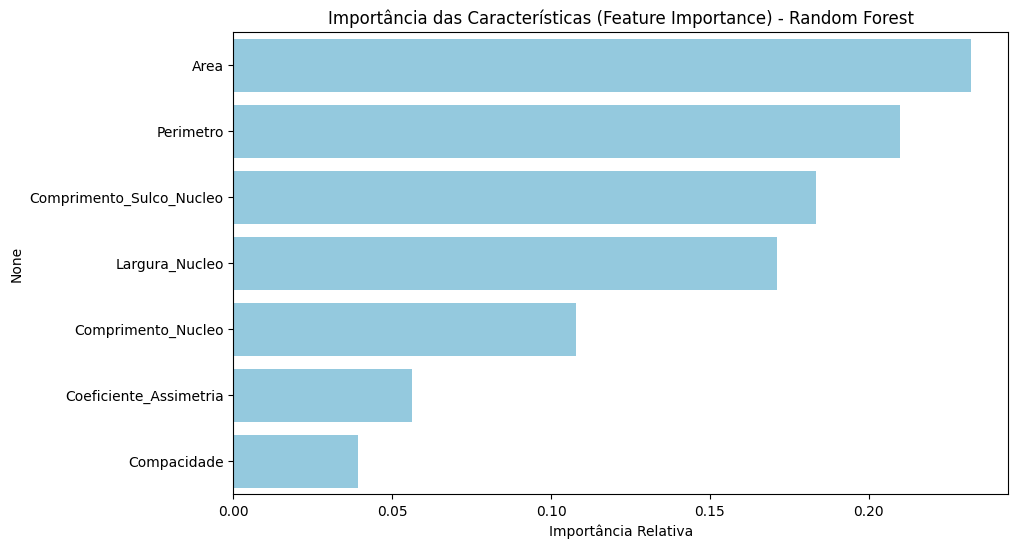


--- Classificação de Importância das Características ---
Area                        0.232346
Perimetro                   0.209964
Comprimento_Sulco_Nucleo    0.183452
Largura_Nucleo              0.171099
Comprimento_Nucleo          0.107694
Coeficiente_Assimetria      0.056350
Compacidade                 0.039096
dtype: float64


In [27]:
# Usar o modelo Random Forest Otimizado
best_rf = best_models['RandomForest_Otimizado']
feature_importances = pd.Series(best_rf.feature_importances_, index=caracteristicas).sort_values(ascending=False)

plt.figure(figsize=(10, 6))

sns.barplot(x=feature_importances.values, y=feature_importances.index, color='skyblue')

plt.title('Importância das Características (Feature Importance) - Random Forest')
plt.xlabel('Importância Relativa')
plt.show()

print("\n--- Classificação de Importância das Características ---")
print(feature_importances)

# 1. Interpretação do Desempenho dos Modelos
Acurácia Excepcional
A principal conclusão do projeto é o desempenho extremamente alto alcançado pelos modelos otimizados, como o SVM Otimizado e o Random Forest Otimizado, que atingiram 100% de Acurácia e 1.0000 de F1-Score.

Interpretação: A acurácia perfeita indica que o conjunto de 7 características físicas dos grãos (Área, Perímetro, Compacidade, etc.) é um separador perfeito das três variedades de trigo (Kama, Rosa e Canadian). Isso demonstra que as diferenças físicas entre as variedades são robustas e consistentes.

Implicação: O problema é extremamente bem definido. O modelo de Aprendizado de Máquina pode ser implementado com total confiança de que a classificação será consistentemente precisa, superando a subjetividade e os erros inerentes à classificação manual.

Robustez do Modelo Recomendado
Embora tanto o SVM quanto o Random Forest tenham atingido a acurácia máxima, o Random Forest Otimizado é o modelo preferível para implantação.

Vantagem: Além de sua alta performance, o Random Forest oferece interpretabilidade através da Feature Importance (Importância das Características). Isso é essencial para entender o fenômeno e otimizar os custos de aquisição de dados (sensores e tecnologia de visão computacional).

2. Insights de Negócio e Importância das Características
O insight mais relevante para a cooperativa agrícola deriva da classificação de importância das características pelo modelo Random Forest. Isso informa quais medições são críticas e onde os investimentos em tecnologia devem ser focados.

Classificação de Importância (Ordem Decrescente)
A ordem de importância das características para a classificação é crucial. Os atributos mais críticos para distinguir as variedades são:

Área

Perímetro

Comprimento do Sulco do Núcleo

Largura do Núcleo

Comprimento do Núcleo

Coeficiente de Assimetria

Compacidade (Menos Importante)

Conclusões para o Contexto Agrícola
Foco em Tamanho e Forma: As características relacionadas ao tamanho (Área e Perímetro) e à forma (Comprimento do Sulco do Núcleo) são de longe as mais importantes. Isso sugere que as três variedades de trigo são mais facilmente distinguíveis por suas dimensões gerais e pela profundidade de seu sulco central.

Otimização do Sistema de Medição: A cooperativa deve investir em um sistema de sensoriamento que garanta a máxima precisão nessas três principais medições (Área, Perímetro e Comprimento do Sulco do Núcleo). Em caso de restrições, pode-se, em teoria, dar menor prioridade à precisão da Compacidade e do Coeficiente de Assimetria.

Viabilidade de Implantação: O projeto estabelece que a classificação automatizada de grãos é não apenas viável, mas altamente confiável (100% de acurácia). A implementação de um sistema baseado neste modelo resultará em:

Maior Velocidade de Processamento.

Eliminação de Erros Humanos na classificação.

Melhor Gestão de Lotes, garantindo que as variedades de maior valor sejam corretamente segregadas e comercializadas.

Conclusão Geral do Projeto
O projeto, seguindo a metodologia CRISP-DM, demonstrou que as características físicas mensuráveis dos grãos de trigo são um preditor perfeito de sua variedade. O Random Forest Otimizado é o modelo ideal, pronto para ser integrado a um sistema de produção, proporcionando um claro Retorno sobre o Investimento (ROI) ao aumentar drasticamente a eficiência operacional e a precisão da classificação dos produtos da cooperativa.